<h1>CG21-T2 Processamento de Imagens</h1>
<p>Faça um notebook que:</p>
<ol>
    <li>Leia e exiba uma imagem RGB.</li>
    <li>Ilustre com um grafico xy a variação dos canais red, green e blue na linha correspondente a metade da altura.</li>
    <li>Transforme a imagem de RGB para uma imagem de luminância,Y, de acordo com a luminancia dos fósforos do sistema sRGB, explicada na pagina 
        <a href="https://en.wikipedia.org/wiki/Relative_luminance#cite_note-2">
            Relative luminance</a> e exiba.</li>
    <li>Transforme a imagem de luminância, Y, em imagem de "lightness", L, do sistema Lab</li>
    <li>Exiba o histograma da imagem de luminância, Y, e responda qual a probabilidade de ao escolhermos randomicamente um pixel ele ter o valor a metade do valor máximo.</li>
    <li>Aplique uma mascara de convolução que indique se um pixel pertence ou não a uma borda.  Exiba o resultado desta convolução numa imagem em tons de cinza.</li>
    <li>Exiba a imagem original no "estilo cartoon" (escureça os pixels que são borda).
</ol>
<p>Obs-Novas funções:<p>
<ul>
    <li>matplotlib.pyplot.imread</li>
    <li>matplotlib.pyplot.imshow</li>
</ul>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#utilizei os arquivos na mesma pasta
path= ""
name= 'lenna.png'
fname = path + name

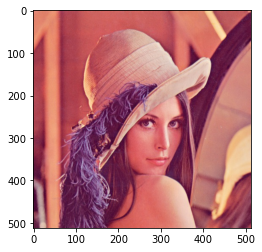

In [3]:
img = plt.imread(fname)

plt.imshow(img)
plt.show()

In [4]:
#numpy array com 4 canais, são 4 porque tem um canal alpha
print(img.shape)

(512, 512, 4)


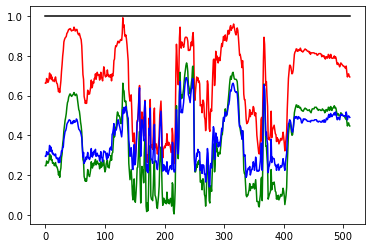

In [5]:
#altura e largura
h ,w = img.shape[:2]

red = img[h//2,:,0]
green = img[h//2,:,1]
blue = img[h//2,:,2]
alpha = img[h//2,:,3] 
x = np.linspace(0,w-1,w)

plt.plot(x,red,'r')
plt.plot(x,green,'g')
plt.plot(x,blue,'b')
plt.plot(x,alpha,'k') 
plt.show() 

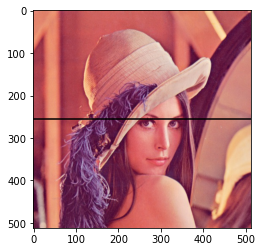

In [6]:
vx = [0,511]
vy = [h//2,h//2]
plt.imshow(img)
plt.plot(vx,vy,'k')
plt.show()

In [7]:
def gamainv(u):
    return 25*u/323 if u < 0.04045 else pow((200.*u+11)/211,12./5)

def lum(rgb):
    red = gamainv(rgb[0])
    green = gamainv(rgb[1])
    blue = gamainv(rgb[2])
    Y = 0.2126*red + 0.7152*green + 0.0722*blue
    return Y

Y = np.zeros((h,w),dtype=np.float)
for y in range(h):
        for x in range(w):
            Y[y,x]= lum(img[y,x,:])

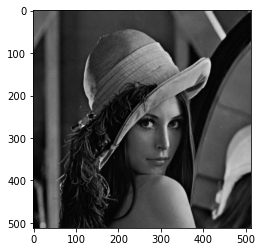

In [8]:
plt.imshow(Y, cmap='gray')
plt.show()

In [9]:
def lightness(Y):
    d = 6/29
    Y1 = pow(Y,1/3) if Y>pow(d,3) else Y/3*d*d+4/29
    L = 1.16*Y1-0.16
    return L

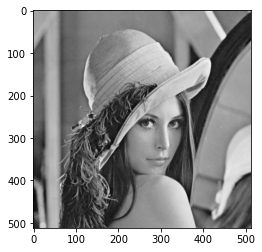

In [10]:
L = np.zeros((h,w),dtype=np.float)
for y in range(h):
    for x in range(w):
        L[y,x]=lightness(Y[y,x])
plt.imshow(L,cmap='gray')
plt.show()

In [11]:
Y_ = np.linspace(0,1,256)
L_ = [lightness(y) for y in Y_]

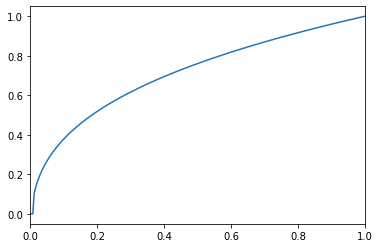

In [12]:
plt.plot(Y_,L_)
plt.xlim([0,1])
plt.ylim()
plt.show()

<h2> Histograma e Função de densidade de probabilidade </h2>

In [13]:
vals = np.round(255*Y)
vals = np.asarray(vals,dtype=np.int)

In [14]:
hist, _ = np.histogram(vals,bins=256)

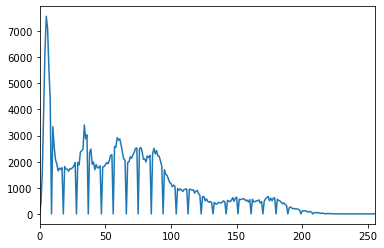

In [15]:
x = np.linspace(0,255,256)
plt.plot(x,hist)
plt.xlim([0,255])
plt.show()

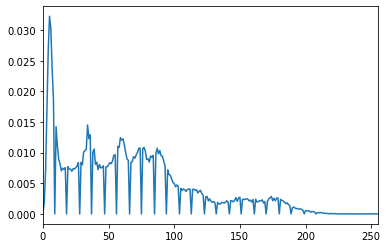

In [16]:
hist2, _ = np.histogram(vals, bins=256,density=True)
plt.plot(x, hist2)
plt.xlim([0,255])
plt.show()

<h2>Indicador de borda</h2>

In [17]:
mask_dx = np.array([[1.,2.,2.],
                   [0.,0.,0.],
                   [-1.,-2.,-1.]])
mask_dy = np.array([[-1.,0.,1.],
                   [-2.,0.,2.],
                   [-1.,0.,1.]])
h,w = L.shape[:2]

edges = np.zeros(shape=(h,w))

for y in range(1,h-1):
    for x in range(1,w-1):
        patch = L[y-1:y+2,x-1:x+2]
        dx = np.sum(patch*mask_dx)
        dy = np.sum(patch*mask_dy)
        edges[y,x] = np.sqrt(dx*dx+dy*dy)
edges =  edges/np.amax(edges)

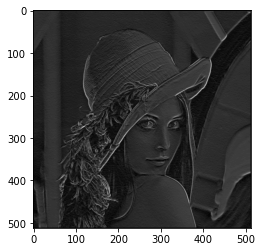

In [18]:
plt.imshow(edges,cmap='gray')
plt.show()

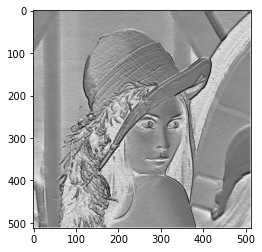

In [19]:
edges =  1 - edges
edges = edges*edges*edges
plt.imshow(edges, cmap='gray')
plt.show()

<h2> Imagem no estilo cartoon </h2>

In [20]:
cartoon = img[:,:,:3].copy()
print(cartoon.shape,img.shape)

(512, 512, 3) (512, 512, 4)


In [21]:
cartoon[:,:,0]=edges*cartoon[:,:,0]
cartoon[:,:,1]=edges*cartoon[:,:,1]
cartoon[:,:,2]=edges*cartoon[:,:,2]

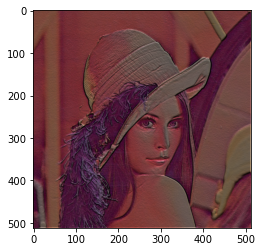

In [22]:
plt.imshow(cartoon)
plt.show()

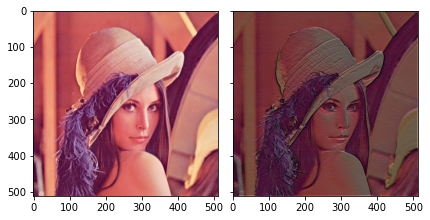

In [23]:
fig, ax = plt.subplots(1,2,sharey=True,tight_layout=True)
ax[0].imshow(img)
ax[1].imshow(cartoon)
plt.show()